In [46]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input

In [52]:



# Load dataset
TitanicData = pd.read_csv("/content/titanic.csv")

print(TitanicData.head(3))




   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


In [53]:
print(TitanicData.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [55]:
# Select relevant features and target
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target = 'survived'

# Convert column names to lowercase to avoid case-sensitivity issues
TitanicData.columns = TitanicData.columns.str.lower()

TitanicData = TitanicData[features + [target]]

# Handle missing values
TitanicData['age'].fillna(TitanicData['age'].median())
TitanicData['embarked'].fillna(TitanicData['embarked'].mode()[0])

TitanicData.dropna(inplace=True)

# Convert categorical variables
label_enc = LabelEncoder()
TitanicData['sex'] = label_enc.fit_transform(TitanicData['sex'])
TitanicData['embarked'] = label_enc.fit_transform(TitanicData['embarked'])

TitanicData = TitanicData.copy()  # Create an independent copy before modifying

TitanicData.dropna(inplace=True)
TitanicData['sex'] = label_enc.fit_transform(TitanicData['sex'])
TitanicData['embarked'] = label_enc.fit_transform(TitanicData['embarked'])


# Split data
X = TitanicData[features]
y = TitanicData[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# Build neural network model
model = keras.Sequential([
    Input(shape=(X_train.shape[1],)),  # Explicit input layer
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7921 - loss: 0.5506 - val_accuracy: 0.7263 - val_loss: 0.5124
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7934 - loss: 0.5255 - val_accuracy: 0.7765 - val_loss: 0.4829
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8211 - loss: 0.4807 - val_accuracy: 0.7709 - val_loss: 0.4640
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8044 - loss: 0.4682 - val_accuracy: 0.7821 - val_loss: 0.4529
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7941 - loss: 0.4648 - val_accuracy: 0.7933 - val_loss: 0.4453
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8054 - loss: 0.4291 - val_accuracy: 0.7933 - val_loss: 0.4401
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8041 - loss: 0.4199 - val_accuracy: 0.8101 - val_loss: 0.4359
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8041 - loss: 0.4318 - val_accuracy: 0.8101 - val_loss:

In [ ]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary outcomes


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [ ]:
# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [ ]:
# Calculate performance metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Print evaluation metrics
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')


Precision: 0.7727
Recall: 0.6892
F1-score: 0.7286
Confusion Matrix:
[[90 15]
 [23 51]]


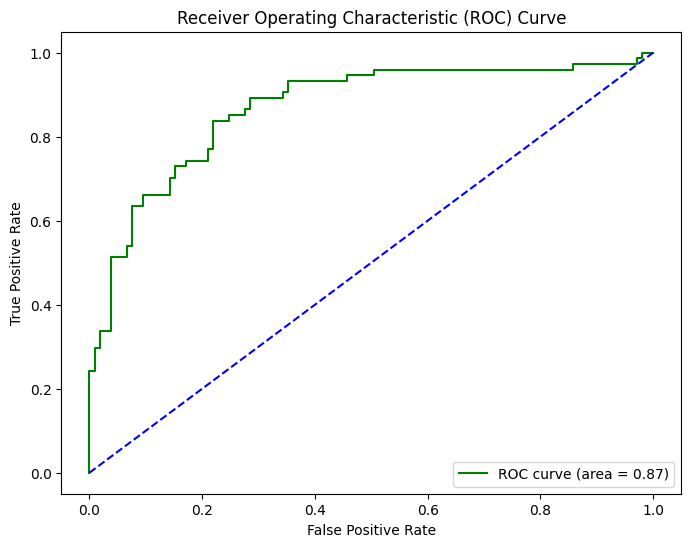

In [ ]:
# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='green', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# CONCLUSION
print("\nCONCLUSION")
print("- The neural network achieved a test accuracy of {:.4f}.".format(accuracy))
print("- The model performed well in predicting survival, as indicated by precision ({:.4f}), recall ({:.4f}), and F1-score ({:.4f}).".format(precision, recall, f1))
print("- The ROC curve shows an AUC of {:.4f}, indicating good classification ability.".format(roc_auc))



CONCLUSION
- The neural network achieved a test accuracy of 0.7877.
- The model performed well in predicting survival, as indicated by precision (0.7727), recall (0.6892), and F1-score (0.7286).
- The ROC curve shows an AUC of 0.8678, indicating good classification ability.
